In [10]:
from pathlib import Path

from matplotlib import pyplot as plt

from eitprocessing.datahandling.loading import load_eit_data


def plot_gi(data):
    t0 = data.time[0]
    plt.plot(data.time - t0, data)

### Load data


In [11]:
data_directory = Path.cwd().parent / "tests" / "test_data"
data_path = Path(data_directory) / "Draeger_Test_4.bin"

sequence = load_eit_data(data_path, vendor="draeger")

### Visualize the global impedance


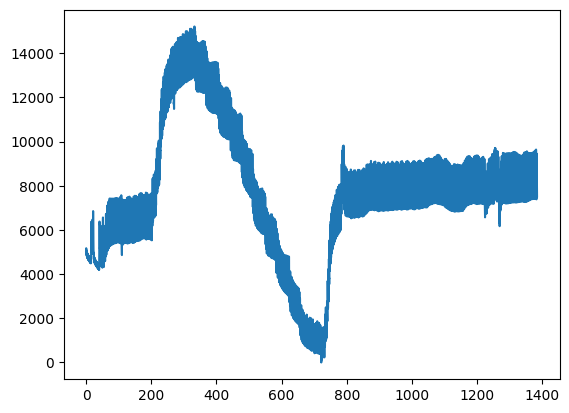

In [12]:
gi = sequence.continuous_data["global_impedance_(raw)"]
plot_gi(gi)

### Select a stable period


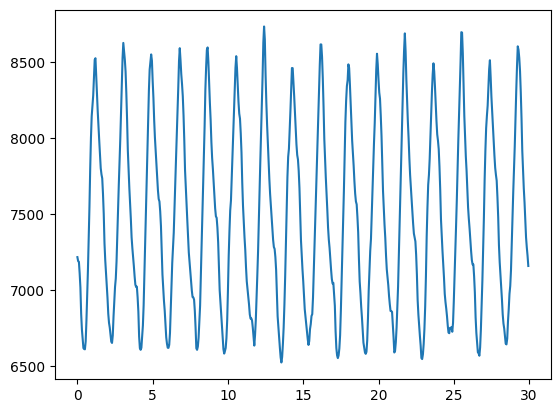

In [13]:
t0 = sequence.time[0]
shorter_sequence = sequence.select_by_time(t0 + 800, t0 + 830)
stable_gi = shorter_sequence.continuous_data["global_impedance_(raw)"]

plot_gi(stable_gi)

### Perform lowpass filtering on this region


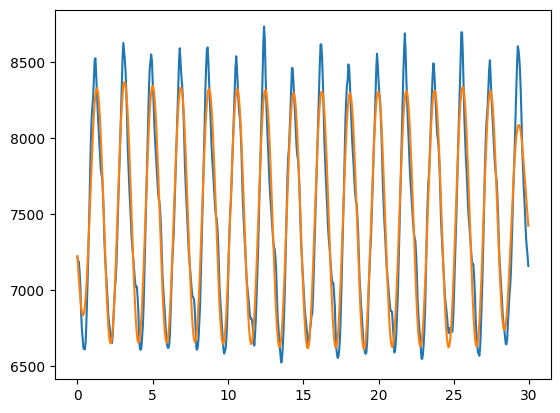

In [14]:
from eitprocessing.filters.butterworth_filters import LowPassFilter

MINUTE = 60

lp_filter = LowPassFilter(
    cutoff_frequency=40 / MINUTE,
    order=10,
    sample_frequency=sequence.eit_data["raw"].framerate,
)

filtered_gi = stable_gi.derive(
    label="global_impedance_(lowpass)",
    function=lp_filter.apply_filter,
    func_args={},
)

shorter_sequence.continuous_data.add(filtered_gi)

plot_gi(stable_gi)
plot_gi(filtered_gi)